In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(
        (point1[0] - point2[0])**2 +
        (point1[1] - point2[1])**2 +
        (point1[2] - point2[2])**2 
    )

In [3]:
data = pd.DataFrame(columns=["x1", "x2", "x3", "y"], 
                    data=[
                      [0, 3, 0, "red"],
                      [2, 0, 0, "red"],
                      [0, 1, 3, "red"],
                      [0, 1, 2, "green"],
                      [-1, 0, 1, "green"],
                      [1, 1, 1, "red"],
                      [0, 0, 0, "none"]
                      ])
data

,x1,x2,x3,y
0,0,3,0,red
1,2,0,0,red
2,0,1,3,red
3,0,1,2,green
4,-1,0,1,green
5,1,1,1,red
6,0,0,0,none


In [4]:
indexes = range(len(data))
distances = pd.DataFrame(index=indexes, columns=indexes)

for i in indexes:
    for j in indexes:
        if i != j:
            distances.at[i, j] = euclidean_distance(
                data.drop(columns=["y"]).iloc[i],
                data.drop(columns=["y"]).iloc[j]
            )

print(distances)

          0         1         2         3         4         5         6
0       NaN  3.605551  3.605551  2.828427  3.316625   2.44949       3.0
1  3.605551       NaN  3.741657       3.0  3.162278  1.732051       2.0
2  3.605551  3.741657       NaN       1.0   2.44949  2.236068  3.162278
3  2.828427       3.0       1.0       NaN  1.732051  1.414214  2.236068
4  3.316625  3.162278   2.44949  1.732051       NaN  2.236068  1.414214
5   2.44949  1.732051  2.236068  1.414214  2.236068       NaN  1.732051
6       3.0       2.0  3.162278  2.236068  1.414214  1.732051       NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_15900\1741246443.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (point1[0] - point2[0])**2 +
C:\Users\Admin\AppData\Local\Temp\ipykernel_15900\1741246443.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (point1[1] - point2[1])**2 +
C:\Users\Admin\AppData\Local\Temp\ipykernel_15900\1741246443.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (point1[2] - point2[2])**2
C:\Users\Adm

In [12]:
test_point_distances = distances[6]
test_point_distances.sort_values()

4    1.414214
5    1.732051
1         2.0
3    2.236068
0         3.0
2    3.162278
6         NaN
Name: 6, dtype: object

In [3]:
df = pd.read_csv("./data/College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df = df.rename({'Unnamed: 0': "College"}, axis=1)
df = df.set_index("College")
df.index

Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', name='College', length=777)

In [8]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [9]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

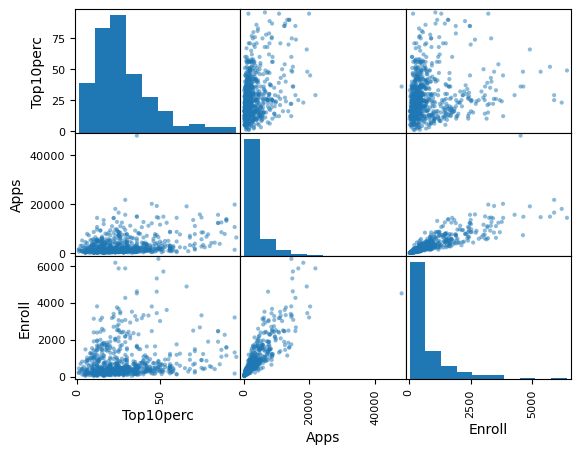

In [13]:
pd.plotting.scatter_matrix(df[["Top10perc", "Apps", "Enroll"]])

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

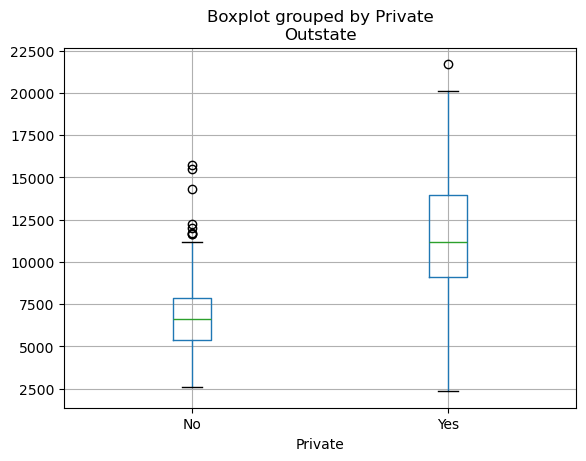

In [18]:
df.boxplot(column="Outstate", by="Private")

<Axes: xlabel='Private', ylabel='Outstate'>

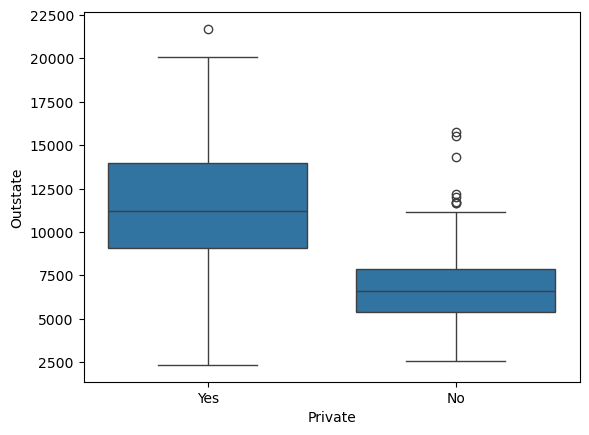

In [19]:
sns.boxplot(data=df, x="Private", y="Outstate")

In [22]:
df["Elite"] = df["Top10perc"].map(lambda x: "Yes" if x >= 50 else "No")
df["Elite"]

College
Abilene Christian University       No
Adelphi University                 No
Adrian College                     No
Agnes Scott College               Yes
Alaska Pacific University          No
                                 ... 
Worcester State College            No
Xavier University                  No
Xavier University of Louisiana     No
Yale University                   Yes
York College of Pennsylvania       No
Name: Elite, Length: 777, dtype: object

In [23]:
df["Elite"].value_counts()

Elite
No     694
Yes     83
Name: count, dtype: int64

<Axes: xlabel='Elite', ylabel='Outstate'>

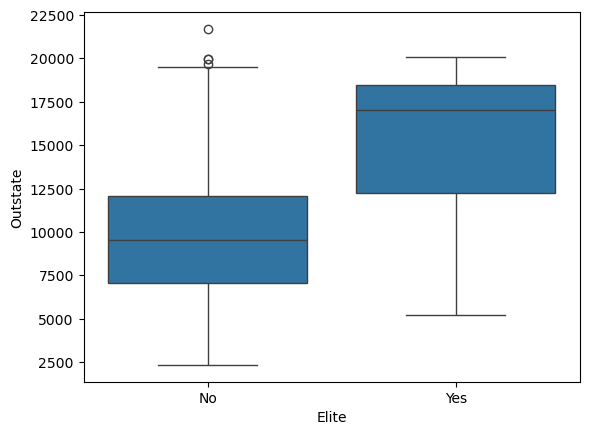

In [24]:
sns.boxplot(df, x="Elite", y="Outstate")

In [25]:
#Start tpo exploring data

In [27]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


In [29]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Elite'],
      dtype='object')

In [45]:
numerical_columns = df.select_dtypes("number").columns

In [46]:
numerical_columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [43]:
categorical_columns = df.select_dtypes("object").columns

In [44]:
categorical_columns

Index(['Private', 'Elite'], dtype='object')

In [38]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [40]:
df.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
Elite          0
dtype: int64

In [49]:
df[numerical_columns].corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<Axes: >

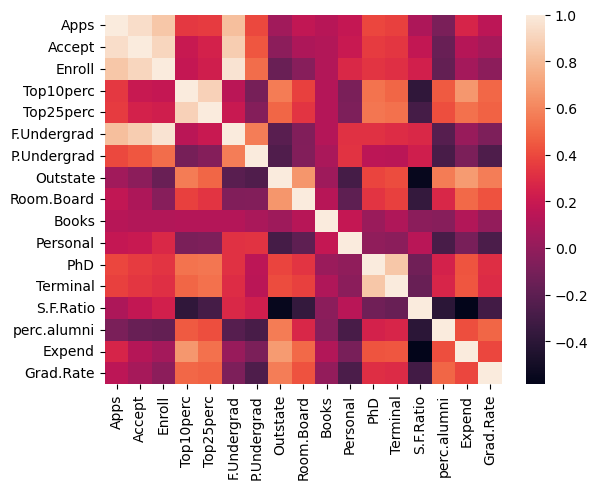

In [51]:
sns.heatmap(data=df[numerical_columns].corr())

<Axes: xlabel='Outstate', ylabel='S.F.Ratio'>

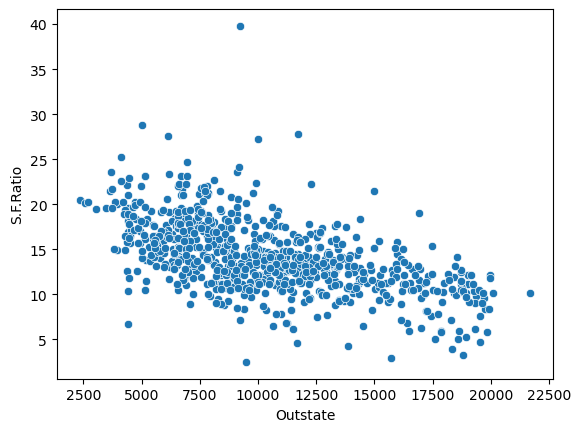

In [52]:
sns.scatterplot(data=df, x="Outstate", y="S.F.Ratio")

<Axes: xlabel='Enroll', ylabel='P.Undergrad'>

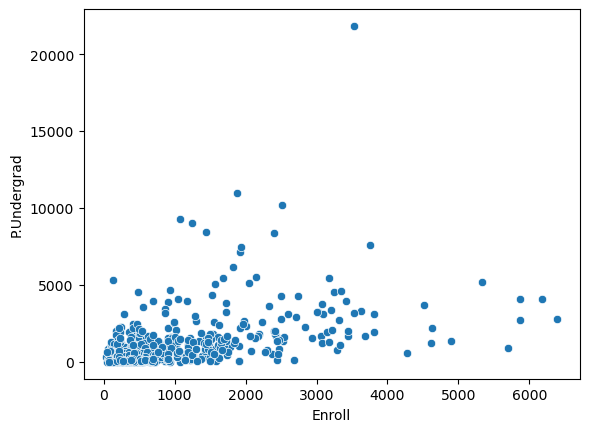

In [53]:
sns.scatterplot(data=df, x="Enroll", y="P.Undergrad")

In [64]:
auto = pd.read_csv("./data/Auto.csv")

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [65]:
auto.index

RangeIndex(start=0, stop=397, step=1)

In [66]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [67]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [68]:
quantitive_predictors = auto.select_dtypes("number").columns
qualitative_predictors = auto.select_dtypes("object").columns

print("Number of predictors: ", len(auto.columns))
print("quantitive: ", quantitive_predictors)
print("qualitive: ", qualitative_predictors)

Number of predictors:  9
quantitive:  Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year',
       'origin'],
      dtype='object')
qualitive:  Index(['horsepower', 'name'], dtype='object')


In [73]:
def range_of_predictor(x):
  return np.abs(x.max() - x.min())

In [83]:
for predictor in quantitive_predictors:
  print(f"Range of {predictor}: {range_of_predictor(auto[predictor])}")
  print(f"Mean of {predictor}: {auto[predictor].mean()}")
  print(f"SD of {predictor}: {auto[predictor].std()}")
  print(" ")

Range of mpg: 37.6
Mean of mpg: 23.51586901763224
SD of mpg: 7.825803928946562
 
Range of cylinders: 5
Mean of cylinders: 5.458438287153652
SD of cylinders: 1.7015769807918517
 
Range of displacement: 387.0
Mean of displacement: 193.53274559193954
SD of displacement: 104.37958329992945
 
Range of weight: 3527
Mean of weight: 2970.2619647355164
SD of weight: 847.9041194897246
 
Range of acceleration: 16.8
Mean of acceleration: 15.55566750629723
SD of acceleration: 2.7499952929761515
 
Range of year: 12
Mean of year: 75.99496221662469
SD of year: 3.690004901461673
 
Range of origin: 2
Mean of origin: 1.5743073047858942
SD of origin: 0.8025494957970386
 


In [84]:
len(auto)

397

In [87]:
auto = auto.drop(index=range(10, 85), axis=0)

In [88]:
len(auto)

322

In [89]:
for predictor in quantitive_predictors:
  print(f"Range of {predictor}: {range_of_predictor(auto[predictor])}")
  print(f"Mean of {predictor}: {auto[predictor].mean()}")
  print(f"SD of {predictor}: {auto[predictor].std()}")
  print(" ")

Range of mpg: 35.6
Mean of mpg: 24.409316770186336
SD of mpg: 7.913357147165568
 
Range of cylinders: 5
Mean of cylinders: 5.37888198757764
SD of cylinders: 1.6573976500687335
 
Range of displacement: 387.0
Mean of displacement: 187.6801242236025
SD of displacement: 100.12092459330134
 
Range of weight: 3348
Mean of weight: 2936.807453416149
SD of weight: 810.9875332023876
 
Range of acceleration: 16.3
Mean of acceleration: 15.700621118012423
SD of acceleration: 2.7064362399285784
 
Range of year: 12
Mean of year: 77.1304347826087
SD of year: 3.1318491244153295
 
Range of origin: 2
Mean of origin: 1.5962732919254659
SD of origin: 0.8155718288077953
 


In [ ]:
auto = pd.read_csv("./data/Auto.csv")

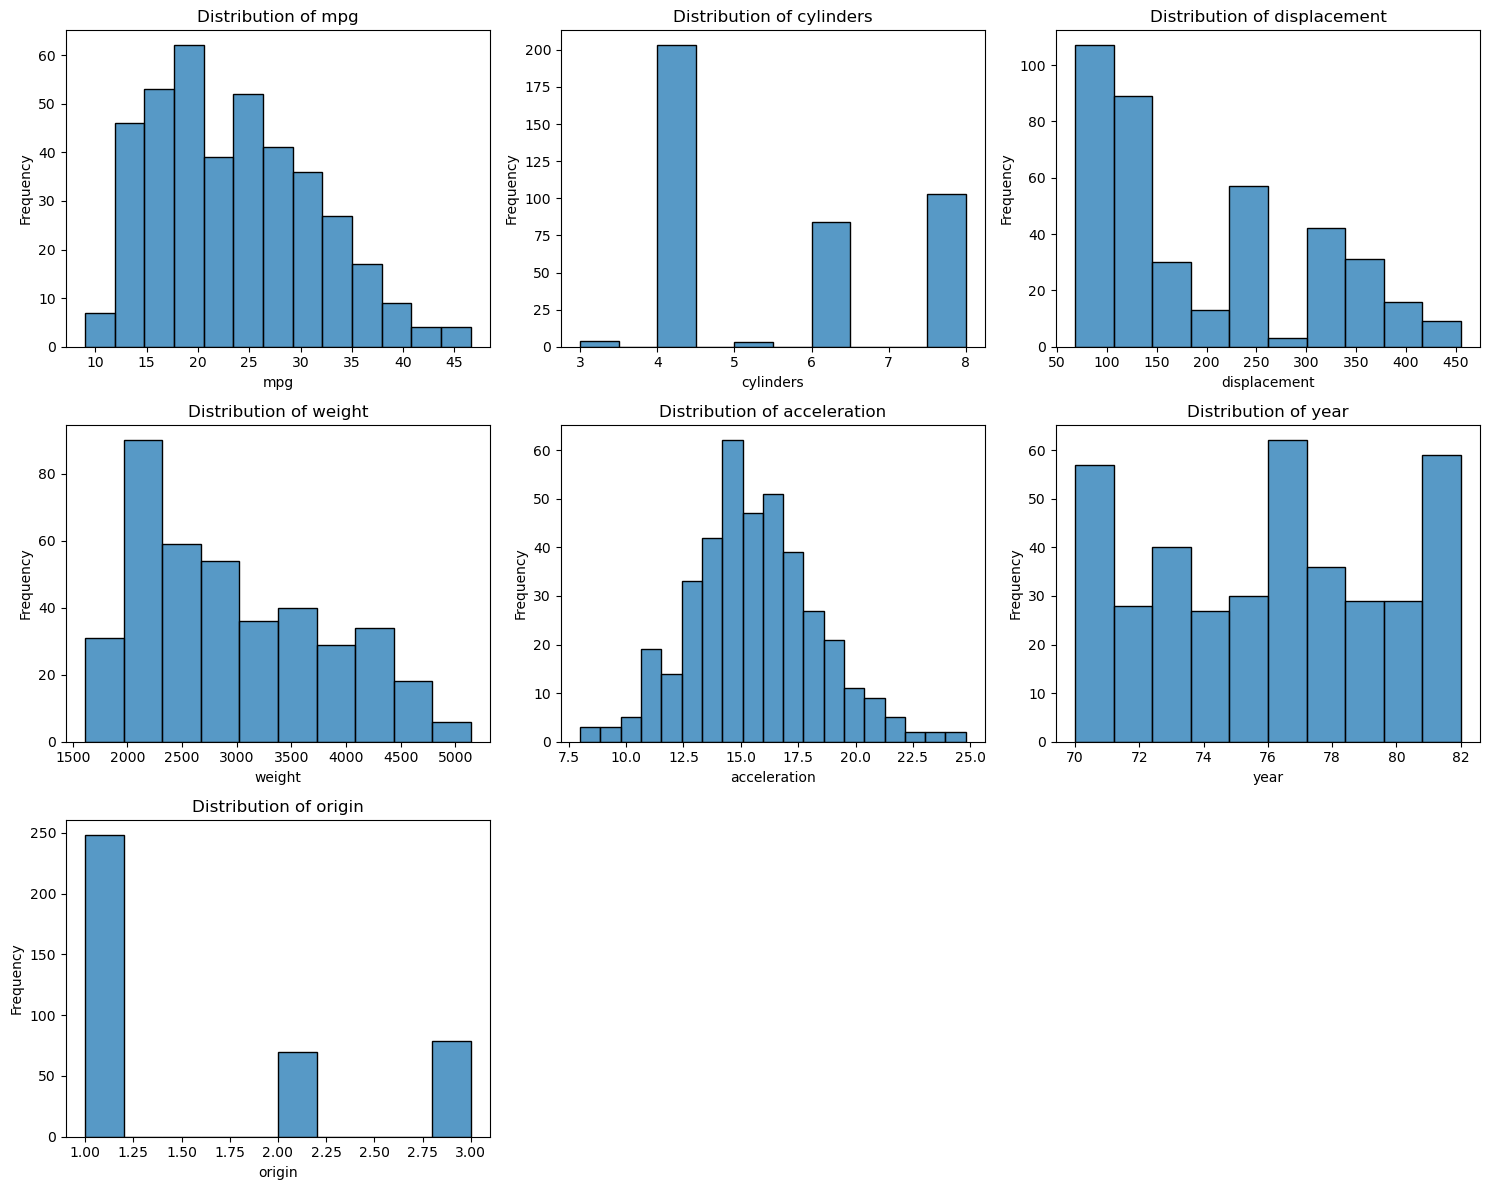

In [104]:
#histograms quantitive predictors

n_cols = 3
n_rows = (len(quantitive_predictors) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, label in enumerate(quantitive_predictors):
  sns.histplot(data=auto, x=label, ax=axes[i])
  axes[i].set_title(f"Distribution of {label}")
  axes[i].set_xlabel(label)
  axes[i].set_ylabel("Frequency")


for j in range(len(quantitive_predictors), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

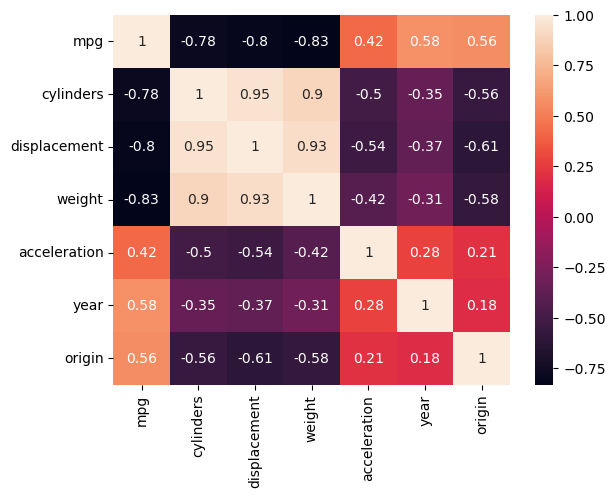

In [110]:
sns.heatmap(auto[quantitive_predictors].corr(), annot=True)

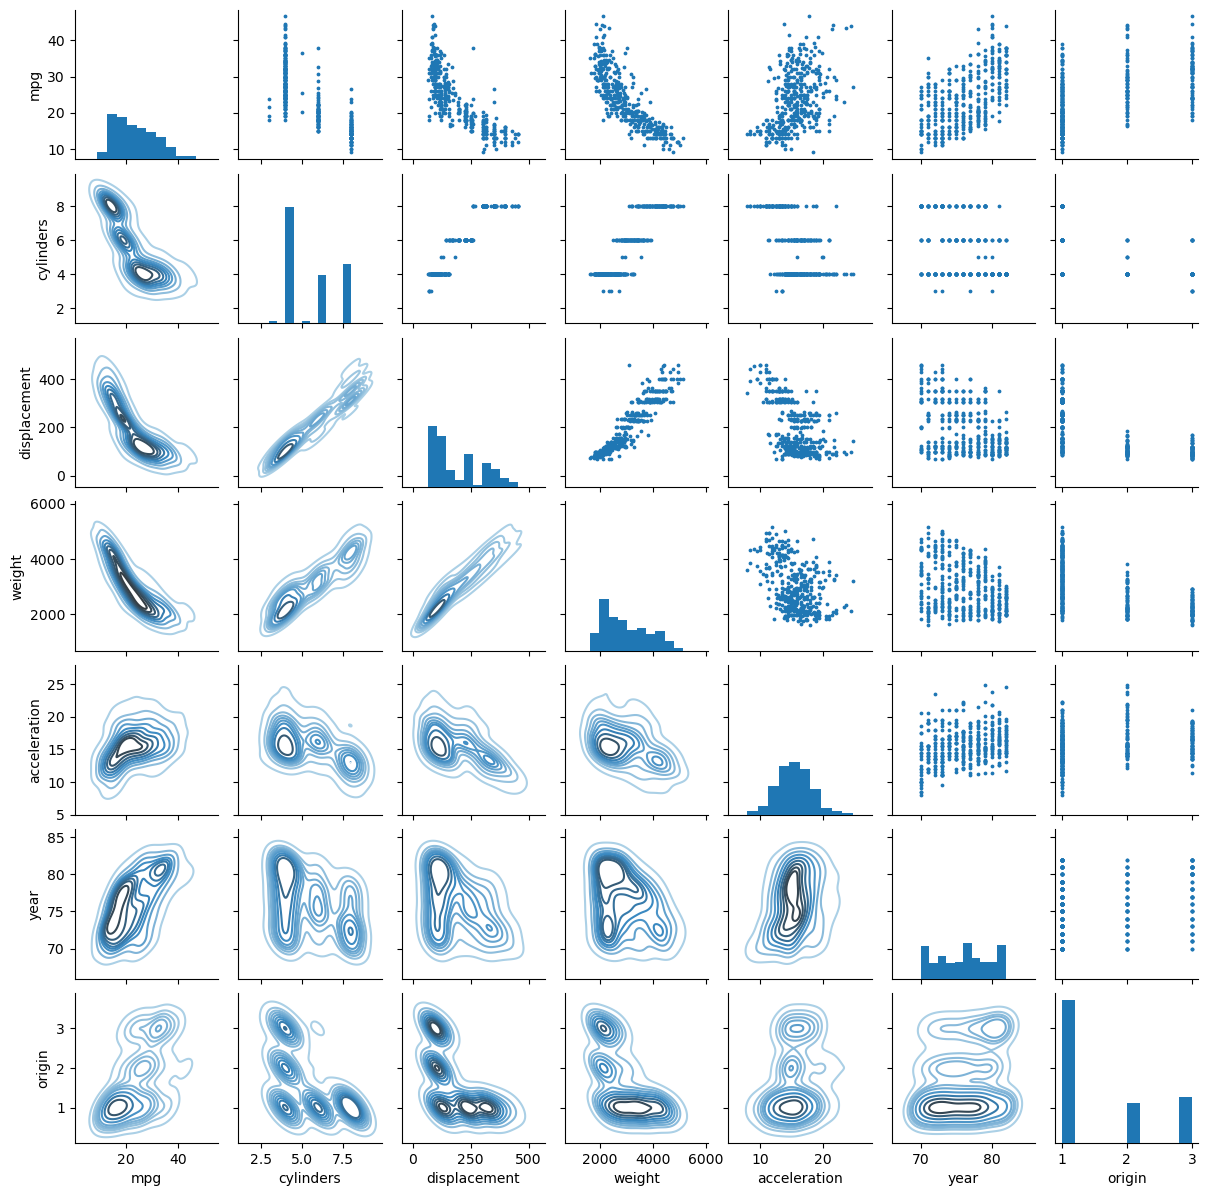

In [117]:
g = sns.PairGrid(auto[quantitive_predictors])
g.map_diag(plt.hist)
g.map_upper(plt.scatter, s=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.figure.set_size_inches(12, 12)

In [1]:
pip install ISLP

In [2]:
from ISLP import load_data

In [4]:
boston = load_data("Boston")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [7]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [9]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [10]:
#crim: per capita crime rate by town.

#zn: proportion of residential land zoned for lots over 25,000 sq.ft.

#indus: proportion of non-retail business acres per town.

#chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#nox: nitrogen oxides concentration (parts per 10 million).

#rm: average number of rooms per dwelling.

#age: proportion of owner-occupied units built prior to 1940.

#dis: weighted mean of distances to five Boston employment centres.

#rad: index of accessibility to radial highways.

#tax: full-value property-tax rate per $10,000.

#ptratio: pupil-teacher ratio by town.

#lstat: lower status of the population (percent).

#medv: median value of owner-occupied homes in $1000s.

In [11]:
quantitive_features = boston.select_dtypes("number").columns
qualitative_features = boston.select_dtypes("object").columns

print(quantitive_features)
print(qualitative_features)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')
Index([], dtype='object')


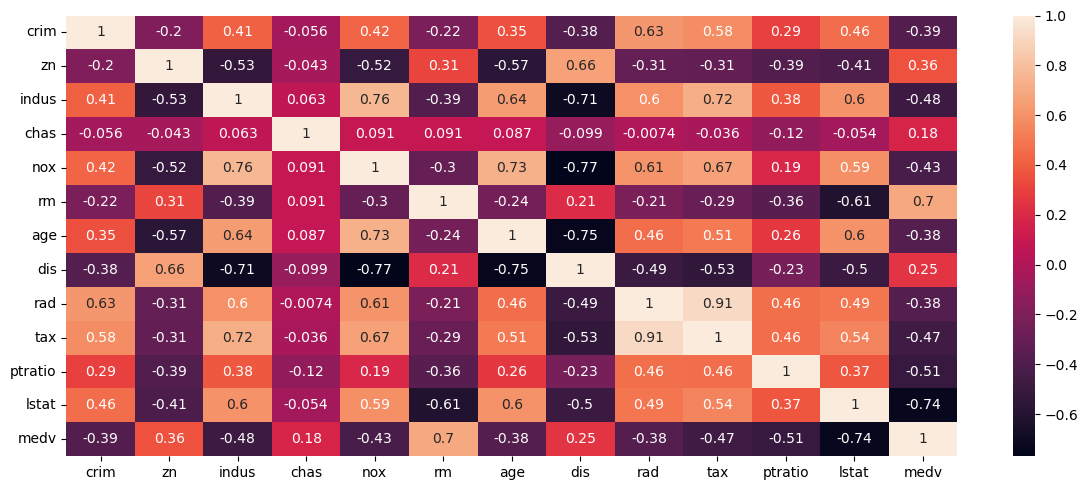

In [15]:
plt.figure(figsize=(12, 5))
fig = sns.heatmap(boston.corr(), annot=True)
plt.tight_layout()
plt.show()

<Axes: xlabel='lstat', ylabel='medv'>

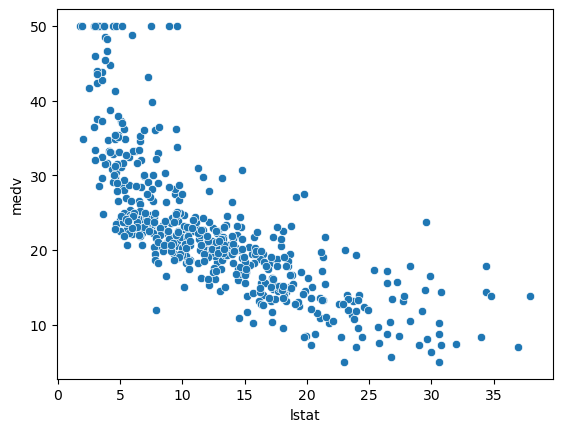

In [20]:
sns.scatterplot(boston, x="lstat", y="medv")

<Axes: xlabel='rm', ylabel='medv'>

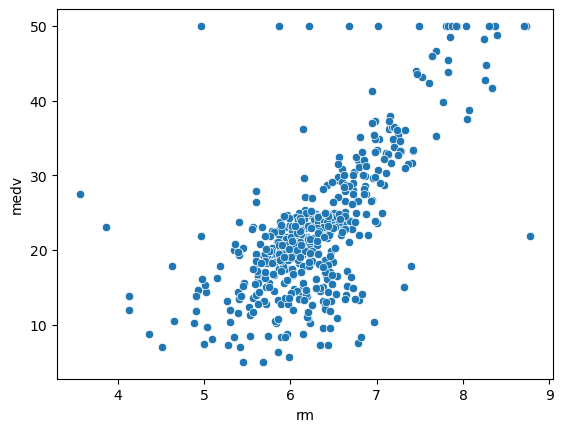

In [21]:
sns.scatterplot(boston, x="rm", y="medv")

<Axes: xlabel='rad', ylabel='crim'>

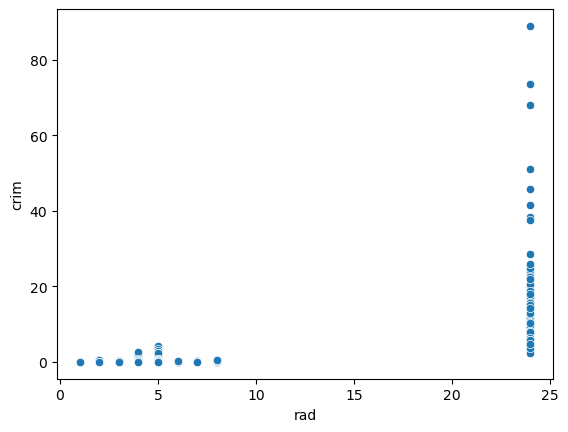

In [23]:
sns.scatterplot(boston, x="rad", y="crim")

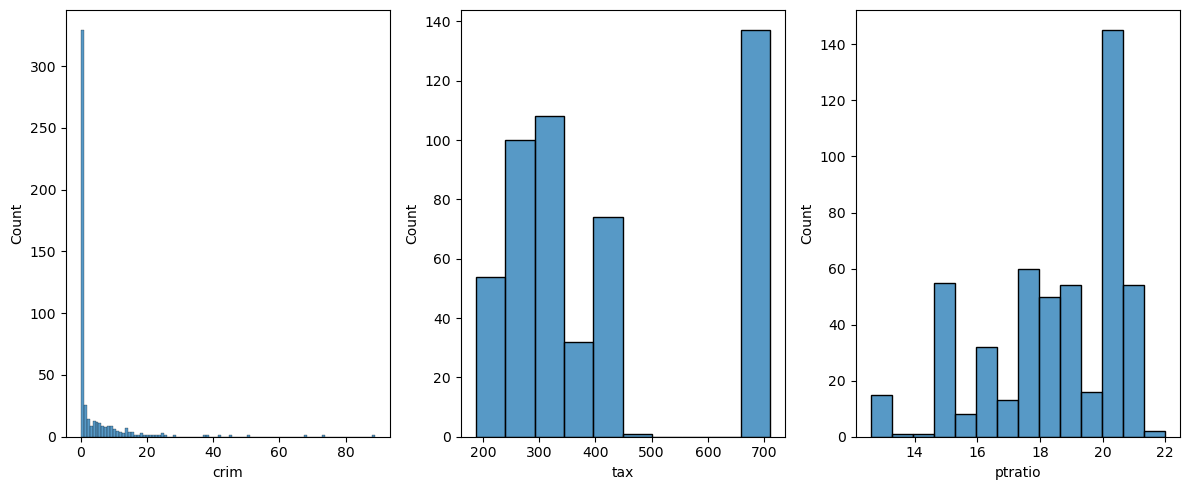

In [24]:
labels = ["crim", "tax", "ptratio"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, label in enumerate(labels):
  sns.histplot(data=boston, x=label, ax=axes[i])
  
  
plt.tight_layout()
plt.show()

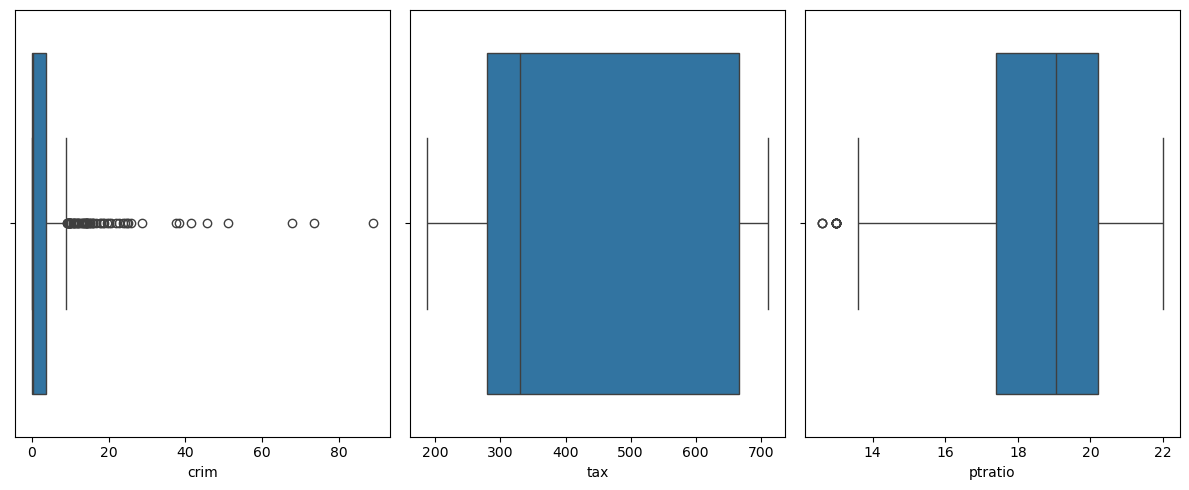

In [25]:
labels = ["crim", "tax", "ptratio"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, label in enumerate(labels):
  sns.boxplot(data=boston, x=label, ax=axes[i])
  
  
plt.tight_layout()
plt.show()

In [30]:
crime_suburbs = boston[boston["crim"] < 20]

len(crime_suburbs)

488

In [31]:
boston["crim"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [35]:
len(boston[boston["chas"] == 1])

35

In [36]:
boston["ptratio"].median()

19.05